In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# ca3_300 = np.load("CA3_300.npy")
# ca3_1000 = np.load("CA3_1000.npy")

# ca1_300 = np.load("CA1_predicted_300.npy")
# ca1_1000 = np.load("CA1_predicted_1000.npy")

In [61]:
ca3_300_100 = np.load("amps_100times/amp_300_100times.npy")
ca3_300_smooth_100 = np.load("amps_100times/amp_300_smooth_100times.npy")

ca3_300 = np.load("amps_smooth/amp_300.npy")
ca3_300_smooth = np.load("amps_smooth/amp_300_smooth.npy")

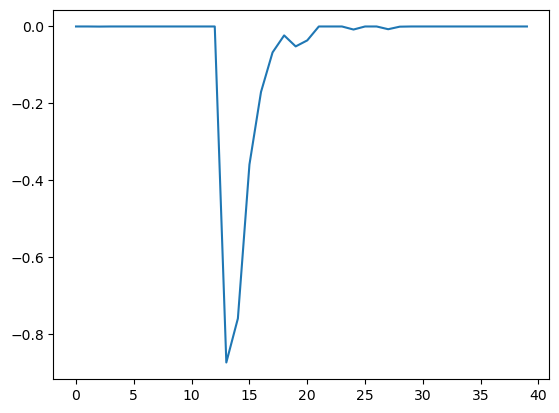

In [62]:
plt.plot(ca3_300_100)

In [63]:
ca3_300_100 = np.concatenate([np.zeros(2028), ca3_300_100[:, 0], np.zeros(2028)])
ca3_300_smooth_100 = np.concatenate([np.zeros(2028), ca3_300_smooth_100, np.zeros(2028)])

ca3_300 = np.concatenate([np.zeros(1898), ca3_300[:, 0], np.zeros(1898)])
ca3_300_smooth = np.concatenate([np.zeros(1898), ca3_300_smooth, np.zeros(1898)])

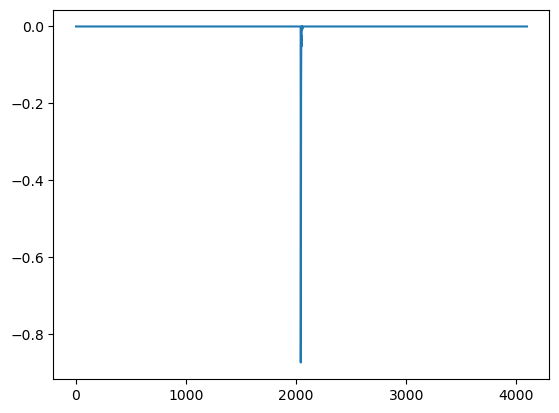

In [64]:
plt.plot(ca3_300_100)

In [57]:
assert ca3_300_100.shape == ca3_300_smooth_100.shape == ca3_300.shape == ca3_300_smooth.shape == (4096, )

In [53]:
MIN = 0.97

In [68]:
conv_ca3_300_100 = np.clip((-ca3_300_100), a_min=0, a_max=None)
conv_ca3_300_smooth_100 = np.clip((-ca3_300_smooth_100 ), a_min=0, a_max=None)
conv_ca3_300 = np.clip((-ca3_300), a_min=0, a_max=None)
conv_ca3_300_smooth = np.clip((-ca3_300_smooth), a_min=0, a_max=None) # *1.25

In [47]:
# conv_ca3_300_100 = np.clip((-ca3_300_100 - MIN), a_min=0, a_max=None)
# conv_ca3_300_smooth_100 = np.clip((-ca3_300_smooth_100 - MIN), a_min=0, a_max=None)
# conv_ca3_300 = np.clip((-ca3_300 - MIN), a_min=0, a_max=None)
# conv_ca3_300_smooth = np.clip((-ca3_300_smooth - MIN), a_min=0, a_max=None) # *1.25

In [69]:
assert conv_ca3_300_100.min() >= 0
assert conv_ca3_300_smooth_100.min() >= 0
assert conv_ca3_300.min() >= 0
assert conv_ca3_300_smooth.min() >= 0

In [72]:
def Convert(x, old_low=0, old_high=5, new_low=0, new_high=4095):
    interval_0_1 = (x - old_low) / (old_high - old_low)
    scaled = new_low + (new_high - new_low) * interval_0_1
    return scaled.astype(int)
    

In [73]:
conv_ca3_300_100 = Convert(conv_ca3_300_100)
conv_ca3_300_smooth_100 = Convert(conv_ca3_300_smooth_100)
conv_ca3_300 = Convert(conv_ca3_300)
conv_ca3_300_smooth = Convert(conv_ca3_300_smooth)

In [85]:
np.savetxt("amps_100times/conv_amp_300_100times.txt", conv_ca3_300_100)
np.savetxt("amps_100times/conv_amp_300_smooth_100times.txt", conv_ca3_300_smooth_100)
np.savetxt("amps_smooth/conv_amp_300.txt", conv_ca3_300)
np.savetxt("amps_smooth/conv_amp_300_smooth.txt", conv_ca3_300_smooth)

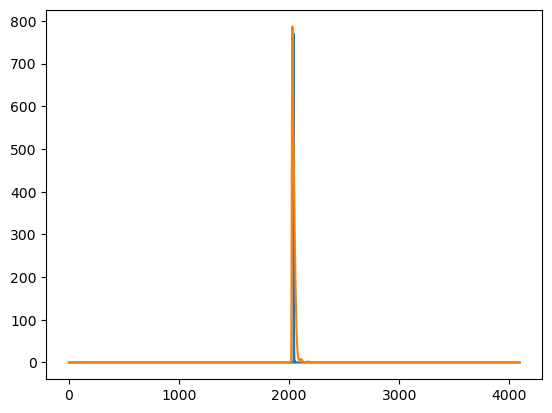

In [83]:
#plt.plot(conv_ca3_300_100)
plt.plot(conv_ca3_300_smooth_100)
#plt.plot(conv_ca3_300)
plt.plot(conv_ca3_300_smooth)